In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("amazon_data_set.csv")

In [5]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,13-04-2022,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,12-03-2023,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,28-09-2022,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,17-04-2022,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,13-03-2022,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [6]:
df.columns

Index(['order_id', 'order_date', 'product_id', 'product_category', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count', 'discounted_price',
       'total_revenue'],
      dtype='object')

In [7]:
df.shape

(50000, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [9]:
df.isna().sum()

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

In [10]:
df1 = df.drop_duplicates()

In [11]:
df["customer_region"].unique()

array(['North America', 'Asia', 'Europe', 'Middle East'], dtype=object)

In [12]:
df["product_category"].unique()

array(['Books', 'Fashion', 'Sports', 'Beauty', 'Electronics',
       'Home & Kitchen'], dtype=object)

In [14]:
df.groupby("product_category")["customer_region"].count()


product_category
Beauty            8465
Books             8327
Electronics       8320
Fashion           8365
Home & Kitchen    8258
Sports            8265
Name: customer_region, dtype: int64

In [15]:
table = df.groupby(["product_category", "customer_region"]).size().unstack(fill_value=0)

table.idxmax(axis=1)


product_category
Beauty            North America
Books                      Asia
Electronics                Asia
Fashion                  Europe
Home & Kitchen      Middle East
Sports            North America
dtype: object

In [16]:
table = df.groupby(["customer_region", "product_category"]).size().unstack(fill_value=0)

table.idxmax(axis=1)


customer_region
Asia               Books
Europe           Fashion
Middle East        Books
North America     Beauty
dtype: object

In [21]:
df.groupby("product_category")["product_category"].count()


product_category
Beauty            8465
Books             8327
Electronics       8320
Fashion           8365
Home & Kitchen    8258
Sports            8265
Name: product_category, dtype: int64

In [22]:
df.rename(columns={"product_category": "product_name"}, inplace=True)

In [23]:
df.columns


Index(['order_id', 'order_date', 'product_id', 'product_name', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count', 'discounted_price',
       'total_revenue'],
      dtype='object')

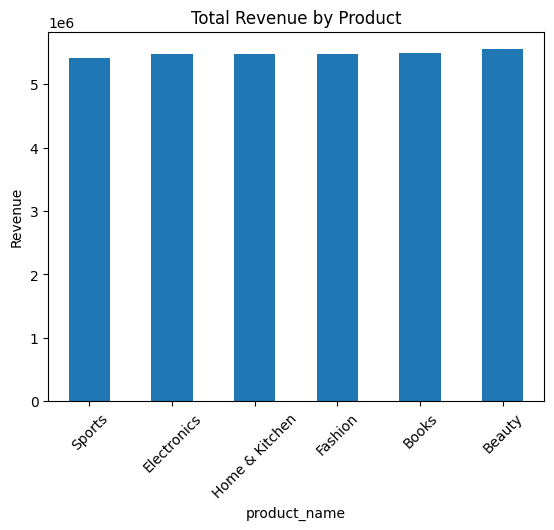

In [24]:
import matplotlib.pyplot as plt

df.groupby("product_name")["total_revenue"].sum().sort_values().plot(kind="bar")

plt.title("Total Revenue by Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


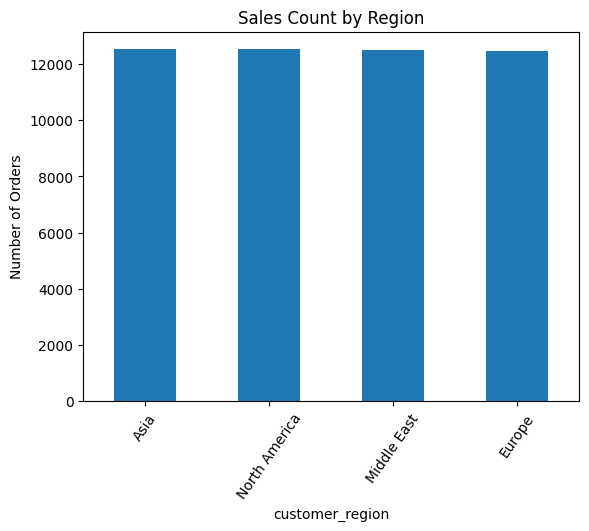

In [26]:
df["customer_region"].value_counts().plot(kind="bar")

plt.title("Sales Count by Region")
plt.ylabel("Number of Orders")
plt.xticks(rotation=55)
plt.show()


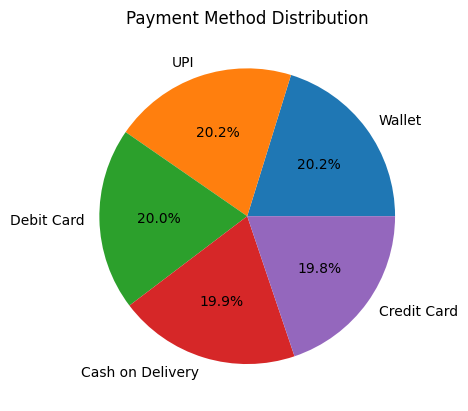

In [27]:
df["payment_method"].value_counts().plot(kind="pie", autopct="%1.1f%%")

plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

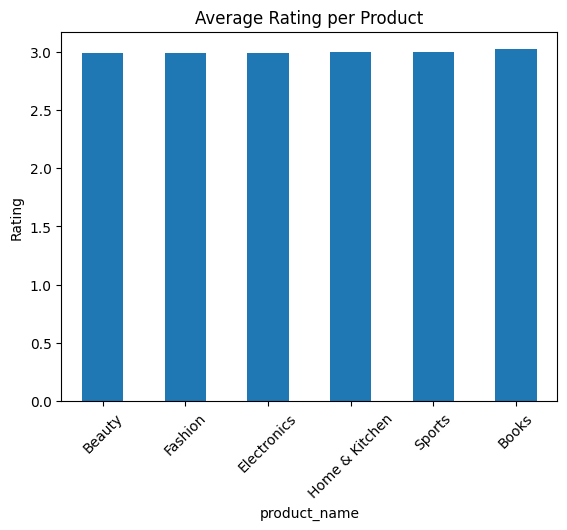

In [28]:
df.groupby("product_name")["rating"].mean().sort_values().plot(kind="bar")

plt.title("Average Rating per Product")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_11308\3457804703.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(df["order_date"])


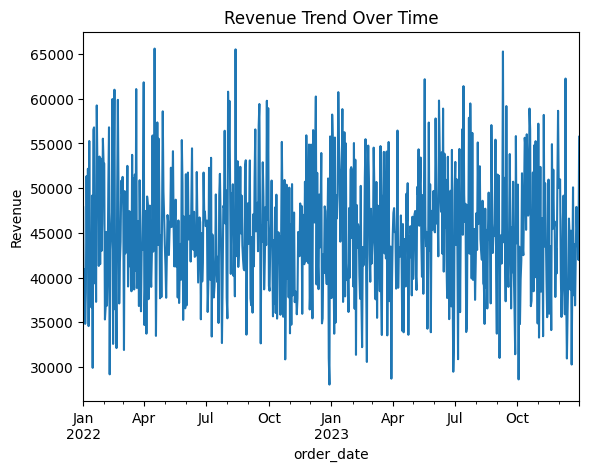

In [29]:
df["order_date"] = pd.to_datetime(df["order_date"])

df.groupby("order_date")["total_revenue"].sum().plot()

plt.title("Revenue Trend Over Time")
plt.ylabel("Revenue")
plt.show()
